In [139]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
def split(n):
    points = []
    for i in range(n):
        points.append(i/(n-1))
    return points

In [141]:
def build_matrix(x):
    n = len(x)
    h=1/(n-1)
    A = np.zeros((n,n))
    b = np.zeros(n)
    A[0,0] = 1
    A[n-1, n-1] = 1
    b[0] = 0
    b[n-1] = 0
    for i in range(1,n-1):
        A[i,i+1] = -1/h**2
        A[i,i] = 2/h**2 +(1+i*h)
        A[i,i-1] = -1/h**2
        b[i] = (i*h)**3 - i*h-2
    return A, b

In [142]:
def sweep(A,b):
    n = len(b)
    alpha = np.zeros(n-1)
    beta = np.zeros(n-1)
    for i in range(1,n-1):
        alpha[i] = -A[i,i+1]/(A[i,i-1]*alpha[i-1]+A[i,i])
        beta[i] = (b[i] - A[i,i-1]*beta[i-1])/(A[i,i-1]*alpha[i-1] + A[i,i])
    y = np.zeros(n)
    for i in range(n-2, 0,-1):
        y[i] = y[i+1] * alpha[i] + beta[i]
    return y

In [143]:
def error_norm(y, u):
    errors = []
    for i in range(len(y)):
        errors.append(np.abs(y[i] - u[i]))
    return np.max(errors)

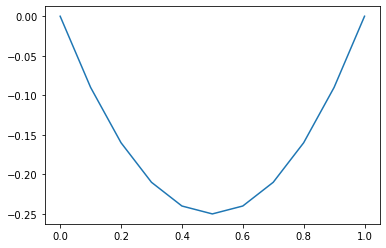

In [144]:
x = split(11)
A, b = build_matrix(x)
y = sweep(A,b)
plt.plot(x,y)

Точное решение это функция $u = x(x-1)$

Норма ошибки = 1.3877787807814457e-16


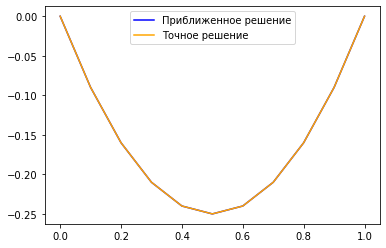

In [145]:
u = lambda x: x*(x-1)
uh = []
for xi in x:
    uh.append(u(xi))
    
print("Норма ошибки =", error_norm(uh,y))
plt.plot(x,y, color="blue", label="Приближенное решение")
plt.plot(x,uh, color="orange", label="Точное решение")
plt.legend()